# Implementation Color Image Enhancement Using the Support Fuzzification in the Framework of the Logarithmic Model

#   

#  

# Loading our pakages -.-

In [47]:
import numpy as np
import cv2
from scipy.special import comb
from matplotlib import pyplot as plt
import math

#  

<img src='img0.png'>

#  

<img src='img1.png'>

In [2]:
EPSILON = 0.00001
def Addition(v1,v2):
    return (v1+v2)/(1+v1*v2+EPSILON)

#  

<img src='img2.png'>

In [3]:
def Subtraction(v1,v2):
    return (v1-v2)/(1-v1*v2+EPSILON)

#  

<img src='img3.png'>

In [4]:
def Multiplication(lamda,v):
    return (pow(1+v,lamda) - pow(1-v,lamda)) / (pow(1+v,lamda) + pow(1-v,lamda)+EPSILON)

#  

<img src='img4.png'>

In [5]:
def Isomorphism(v):
    return 0.5*np.log((1+v)/(1-v+EPSILON))

#  

<img src='img5.png'>

In [6]:
def Product(v1,v2):
    return Isomorphism(v1)*Isomorphism(v2)

#  

<img src='img6.png'>

In [7]:
def norm(v):
    return np.sqrt(abs(Product(v,v)))

#  

<img src='img6,1.png'>

#  

# For gray Image -.-

# The Fuzzification of the Image Support

<img src='img8.png'>
<img src='img9.png'>

In [26]:
def P(img,m,n):

    width = img.shape[0]
    high = img.shape[1]
    P = np.ones((m,n,int(img.shape[0]),int(img.shape[1])),dtype = np.float)

    shapex = 0
    shapey = 0
    for i in range(m):
        shapex = 0
        shapey = 0
        for j in range(n):
            x0 = 0
            x1 = img.shape[0]
            y0 = 0
            y1 = img.shape[1]
            for x in range(img.shape[0]):
                for y in range(img.shape[1]):
                    qx = comb(m,i)*( ((x-x0)**i) * ((x1-x)**(m-i)) ) / ((x1**n)+EPSILON)
                    qy = comb(n,i)* ( ((y-y0)**j) * ((y1-y)**(n-j)) ) / ((y1**n)+EPSILON)
                    P[i][j][x][y] = qx * qy
                    
    return P

#  

<img src='img10.png'>

In [9]:
def Wij(P,m,n):
    ghama = 2
    W = np.zeros((m,n,P.shape[2],P.shape[3]))
    count = 0 
    index = 0
    for i in range(m):
        for j in range(n):
            xx = 0
            yy = 0
            pijPowerAlpha = np.power(P[i, j], ghama)
            for x in range(img.shape[0]):           
                for y in range(img.shape[1]):                                     
                    W[i][j][x][y] = pijPowerAlpha[x, y]/(np.sum( np.power(P[:, :, x, y], ghama)) +EPSILON)
    return W

#  

<img src='img11.png'>

In [10]:
def card_Wij(W):
    sumW = 0
    sumW = np.sum(W[ :, :])
    return sumW

#  

<img src='img12.png'>

In [19]:
def meanW(img,W,card):
    temp = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):            
            M = Multiplication(W[x][y]/card,img[x][y])
            temp = Addition(M,temp)
    return temp

#  

<img src='img13.png'>

In [20]:
def varience(img,W,card,mean):
    M = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            M += (W[x][y]*pow(norm(Subtraction(img[x][y],mean)),2))
    M = M/(card+EPSILON)    
    return np.sqrt(M)

#  

# The Enhancement Method for Gray Level Image -.-

<img src='img14.png'>

In [13]:
def lamda_ij(varience):    
    return math.sqrt((1/3))/(varience+EPSILON)

#  

<img src='img15.png'>

In [21]:
def Taw(img,mean):
    sumT = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            sumT += Subtraction(img[x][y],mean)
            
    return sumT

#  

<img src='img16.png'>

In [15]:
def Window_enh(img,lamda,taw):
    return Multiplication(lamda,taw)

#  

<img src='img17.png'>

In [16]:
def transformSpaces(image, sourceLeftLimit, sourceRightLimit, destinationLeftLimit, destinationRightLimit):
    return ((image - sourceLeftLimit) / (sourceRightLimit - sourceLeftLimit)) * (destinationRightLimit - destinationLeftLimit) + destinationLeftLimit

In [24]:
img = cv2.imread('gray1.png',0)
transformedImage = transformSpaces(img, 0, 255, -1, 1)

m = n = int(input('how many the fuzzy partition : '))

P = P(img,m,n)

W = Wij(P,m,n)

newImage = np.zeros((img.shape[0], img.shape[1]))

for i in range(m):
    for j in range(n):
        card = card_Wij(W[i][j])
        M = meanW(transformedImage,W[i][j],card)
        V = varience(transformedImage,W[i][j],card,M)
        lamda = lamda_ij(V)
        taw = Taw(img,M)
        taw = M
        secondeTerm = Subtraction(transformedImage, taw)                
        tt = Multiplication(lamda,secondeTerm)
        for x in range(0, img.shape[0]):
                for y in range(0, img.shape[1]):                    
                    newImage[x, y] = Addition(newImage[x, y], Multiplication(W[i, j, x, y], tt[x, y]))                    

how many the fuzzy partition : 2


# Show The Result -.-

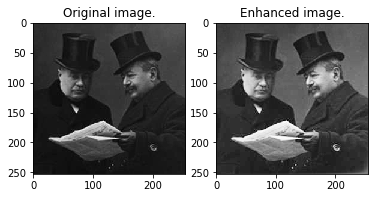

In [25]:
newImage = transformSpaces(newImage, -1, 1, 0, 255)
newImage = np.round(newImage)
newImage = newImage.astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap = 'gray')
plt.title('Original image.')
plt.subplot(1, 2, 2)
plt.imshow(newImage, cmap = 'gray')
plt.title('Enhanced image.')
plt.show()

#  

<img src='img17,1.png'>

#  

# For Color Image -.-

<img src='img18.png'>

In [49]:
img = cv2.imread('C.png')
B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

G_trans = transformSpaces(G, 0, 255, -1, 1)
B_trans = transformSpaces(B, 0, 255, -1, 1)
R_trans = transformSpaces(R, 0, 255, -1, 1)

#  

<img src='img19.png'>

In [50]:
def luminosity(G_trans,B_trans,R_trans):
    return Multiplication(1/3,Addition(Addition(G_trans,B_trans),R_trans))

#  

<img src='img20.png'>

In [51]:
m = n = int(input('how many the fuzzy partition : '))
PG = P(G,m,n) 
PB = P(B,m,n) 
PR = P(R,m,n)

how many the fuzzy partition : 2


#  

<img src='img21.png'>

In [52]:
WG = Wij(PG,m,n) 
WB = Wij(PB,m,n) 
WR = Wij(PR,m,n)

#  

<img src='img22.png'>

In [53]:
def color_enh(newImage,W,transformedImage,m,n,l):
    for i in range(m):
        for j in range(n):
            card = card_Wij(W[i][j])
            M = meanW(l,W[i][j],card)
            V = varience(l,W[i][j],card,M)
            lamda = lamda_ij(V)
            taw = Taw(img,M)
            taw = M
            secondeTerm = Subtraction(transformedImage, taw)                
            tt = Multiplication(lamda,secondeTerm)
            for x in range(0, img.shape[0]):
                    for y in range(0, img.shape[1]):                    
                        newImage[x, y] = Addition(newImage[x, y], Multiplication(W[i, j, x, y], tt[x, y])) 
    newImage = transformSpaces(newImage, -1, 1, 0, 255)
    newImage = np.round(newImage)
    newImage = newImage.astype(np.uint8)
    return newImage

In [54]:
l = luminosity(G_trans,B_trans,R_trans)
G_enh = np.zeros((img.shape[0], img.shape[1]))
G_enh = color_enh(G_enh,WG,G_trans,m,n,l)

B_enh = np.zeros((img.shape[0], img.shape[1]))
B_enh = color_enh(B_enh,WB,B_trans,m,n,l)

R_enh = np.zeros((img.shape[0], img.shape[1]))
R_enh = color_enh(R_enh,WR,R_trans,m,n,l)

#  

# Show The Result -.-

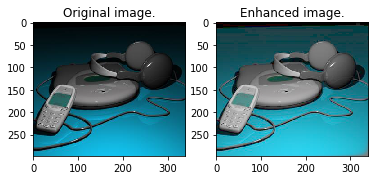

In [55]:
enh = np.zeros((img.shape[0], img.shape[1],3),dtype=np.uint8)
enh[:,:,0] = B_enh
enh[:,:,1] = G_enh
enh[:,:,2] = R_enh

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original image.')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(enh, cv2.COLOR_BGR2RGB))
plt.title('Enhanced image.')
plt.show()

#  

<img src='img22,1.png'>

#  

In [43]:
def get_enh_image(img,m,n):
    
    B = img[:,:,0]
    G = img[:,:,1]
    R = img[:,:,2]

    B_trans = transformSpaces(B, 0, 255, -1, 1)
    G_trans = transformSpaces(G, 0, 255, -1, 1)
    R_trans = transformSpaces(R, 0, 255, -1, 1)
    
    PB = P(B,m,n)
    PG = P(G,m,n)  
    PR = P(R,m,n)
    
    WB = Wij(PB,m,n)
    WG = Wij(PG,m,n) 
    WR = Wij(PR,m,n)
    
    l = luminosity(G_trans,B_trans,R_trans)
    
    B_enh = np.zeros((img.shape[0], img.shape[1]))
    B_enh = color_enh(B_enh,WB,B_trans,m,n,l)
    
    G_enh = np.zeros((img.shape[0], img.shape[1]))
    G_enh = color_enh(G_enh,WG,G_trans,m,n,l)

    R_enh = np.zeros((img.shape[0], img.shape[1]))
    R_enh = color_enh(R_enh,WR,R_trans,m,n,l)
    
    enh = np.zeros((img.shape[0], img.shape[1],3),dtype=np.uint8)
    enh[:,:,0] = B_enh
    enh[:,:,1] = G_enh
    enh[:,:,2] = R_enh
    
    return enh

# Image 1 -.-

how many the fuzzy partition : 2


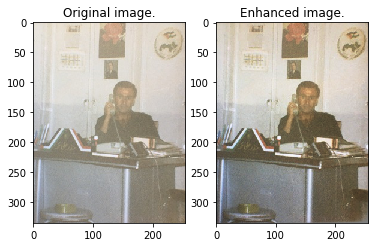

In [46]:
img = cv2.imread('c2.jpg')
m = n = int(input('how many the fuzzy partition : '))

enh = get_enh_image(img,m,n)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original image.')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(enh, cv2.COLOR_BGR2RGB))
plt.title('Enhanced image.')
plt.show()

# Image 2 -.-

how many the fuzzy partition : 2


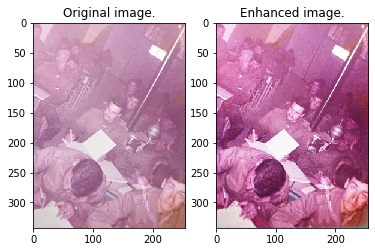

In [44]:
img = cv2.imread('c3.jpg')
m = n = int(input('how many the fuzzy partition : '))

enh = get_enh_image(img,m,n)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original image.')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(enh, cv2.COLOR_BGR2RGB))
plt.title('Enhanced image.')
plt.show()

# Image 3 -.-

how many the fuzzy partition : 2


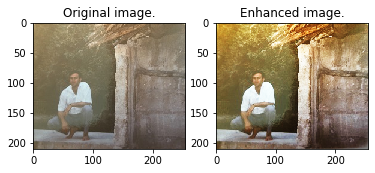

In [45]:
img = cv2.imread('c4.jpg')
m = n = int(input('how many the fuzzy partition : '))

enh = get_enh_image(img,m,n)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original image.')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(enh, cv2.COLOR_BGR2RGB))
plt.title('Enhanced image.')
plt.show()